<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

In [2]:
import pandas as pd
pokemon_data = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

pokemon_data = pd.read_csv(pokemon_data)

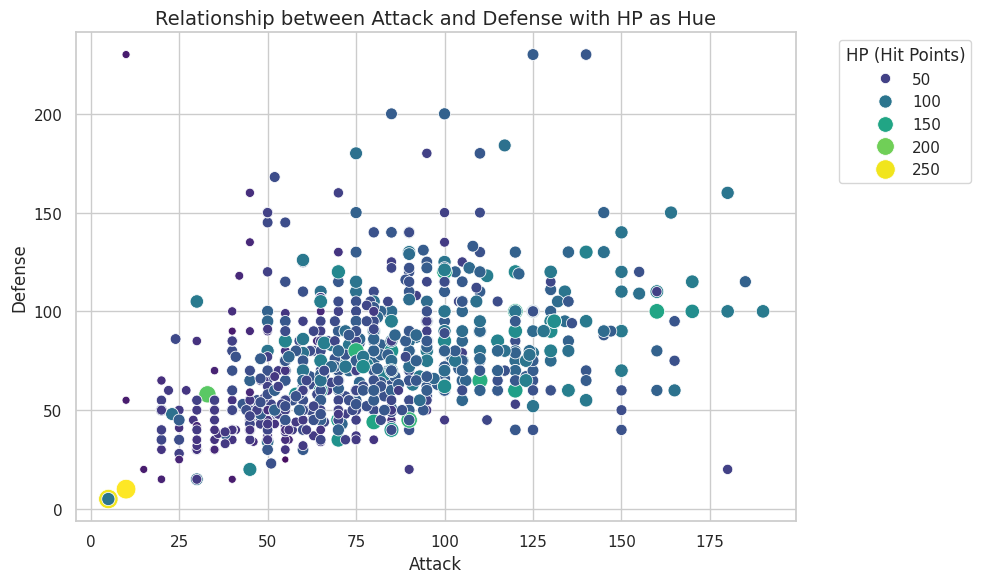

In [3]:
# Your code here . . .
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set_theme(style="whitegrid")

# Create the scatter plot for Attack vs Defense with HP as hue
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=pokemon_data,
    x="Attack",
    y="Defense",
    hue="HP",
    palette="viridis",
    size="HP",
    sizes=(20, 200),
    legend="auto"
)
plt.title("Relationship between Attack and Defense with HP as Hue", fontsize=14)
plt.xlabel("Attack", fontsize=12)
plt.ylabel("Defense", fontsize=12)
plt.legend(title="HP (Hit Points)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From the plot, I observed....
There is a broad distribution in the relationship between Attack and Defense stats.
Pokémon with higher Hit Points (HP), indicated by lighter colors (yellow-green), are more likely to have a balance between high Attack and Defense stats.
Many Pokémon cluster around the lower Attack and Defense ranges, indicating these are common traits among Pokémon.
There are some outliers with exceptionally high Attack or Defense values.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

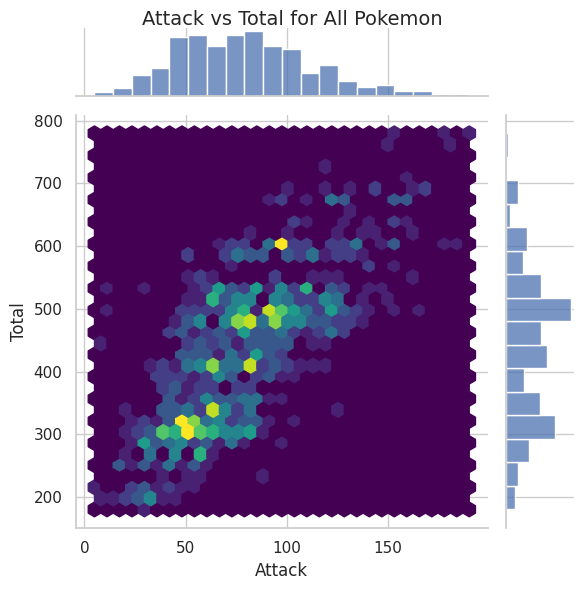

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a hexbin plot for Attack vs Total using seaborn's jointplot
hexbin_plot = sns.jointplot(
    data=pokemon_data,
    x="Attack",
    y="Total",
    kind="hex",
    gridsize=30,
    cmap="viridis"
)

# Add a title to the plot
hexbin_plot.fig.suptitle("Attack vs Total for All Pokemon", fontsize=14)
hexbin_plot.fig.tight_layout()
hexbin_plot.fig.subplots_adjust(top=0.95)

plt.show()


From the plot, I observed....
There is a positive correlation between the Attack stat and the Total stat, as Pokémon with higher Attack values tend to have higher Total values.
The densest region of data (yellow and green hexagons) lies in the range of 50–100 for Attack and 300–500 for Total, suggesting that most Pokémon have moderate Attack and Total stats.
The plot also shows fewer Pokémon with very high Attack or Total values, as indicated by the sparsity in the upper right region.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

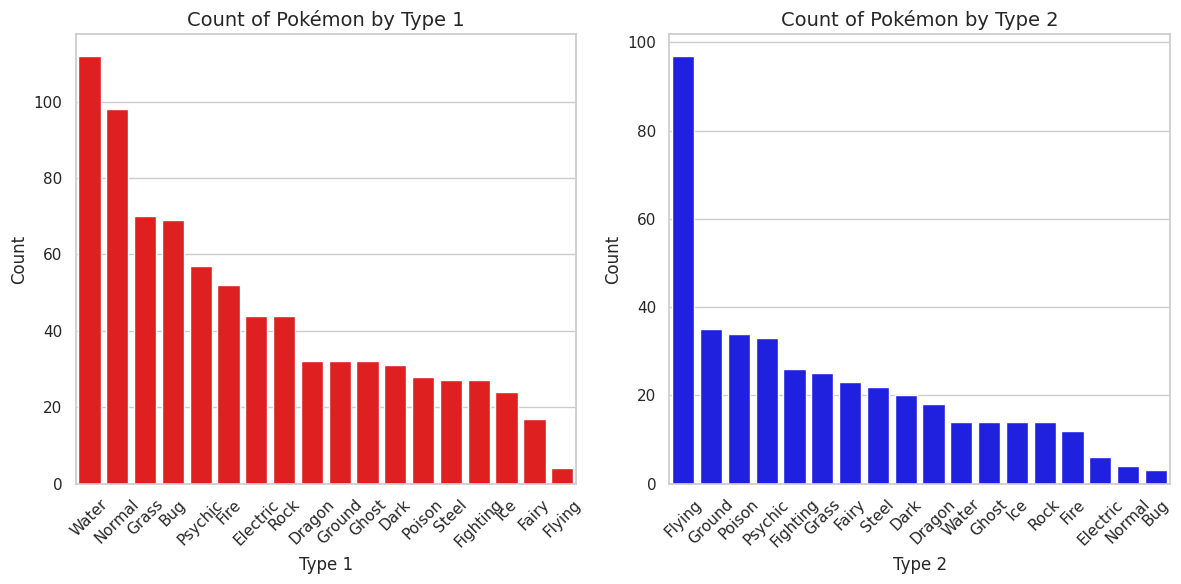

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create categorical plots for Type 1 and Type 2
plt.figure(figsize=(12, 6))

# Plot for Type 1
plt.subplot(1, 2, 1)
sns.countplot(data=pokemon_data, x="Type 1", order=pokemon_data["Type 1"].value_counts().index, color="red")
plt.title("Count of Pokémon by Type 1", fontsize=14)
plt.xlabel("Type 1", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

# Plot for Type 2
plt.subplot(1, 2, 2)
sns.countplot(data=pokemon_data, x="Type 2", order=pokemon_data["Type 2"].value_counts().index, color="blue")
plt.title("Count of Pokémon by Type 2", fontsize=14)
plt.xlabel("Type 2", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Ans:
Type 1:

The most common primary Pokémon type is Water, followed by Normal and Grass.
The least common primary Pokémon types are Fairy and Flying.
Type 2:

The most common secondary Pokémon type is Flying, followed by Ground and Poison.
The least common secondary Pokémon types are Bug, Normal, and Electric.